In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, mean_squared_error
import xgboost as xgb

pd.set_option('display.max_columns', None)

In [25]:
df = pd.read_csv('data/dataset_with_clusters.csv')
df.head(3)

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI,Daily meals frequency,Calories,sugar_g,serving_size_g,rating,Name of Exercise,Sets,Reps,Benefit,Burns Calories (per 30 min),Target Muscle Group,Equipment Needed,Difficulty Level,Body Part,Type of Muscle,Workout,sodium_g,cholesterol_g,Carbs,Proteins,Fats,meal_name,BMR,PAL,TDEE,E_raw,E_eff,E,pct_HRR,I,workload,S,Duration_min,D,pen_age,pen_bmi,pen_hrr,pen_skill,R,C,P,cal_from_protein,cal_from_carbs,cal_from_fats,pct_p,pct_c,pct_f,M,ED,F,diet_type,Cluster,cluster_description
0,35,Male,65.27,1.62,188.58,157.65,69.05,1.00,1080.90,Strength,1.50,4,2,24.870447,3,1806.0,31.77,120.47,1.31,Decline Push-ups,5,21,Improves shoulder health and posture,342.58,"Shoulders, Triceps",Cable Machine,3,Legs,Lats,Dumbbell flyes,1.72994,0.28505,267.68,106.05,71.63,Grilled Vegan Lunch,1495.20,1.900,2840.88000,0.295123,0.845312,0.570217,0.741237,0.526466,105,0.250000,60.0,0.333333,0.404762,0.336004,0.0,1,0.637294,0.521061,0.342572,424.20,1070.72,644.67,0.198262,0.500432,0.301305,0.697313,0.258372,0.173291,Vegan,1.0,Normal weight & low activity
1,23,Female,56.41,1.55,179.43,131.75,73.18,1.37,1809.91,HIIT,1.90,4,2,23.479709,3,1577.0,12.34,109.15,1.92,Bear Crawls,4,16,Strengthens lower abs,357.16,"Back, Core, Shoulders",Step or Box,2,Chest,Lats,Lateral raises,0.69308,0.30061,214.32,85.41,56.97,Fried Vegetarian Lunch,1256.85,1.900,2388.01500,0.579037,0.902949,0.740993,0.551247,0.256055,64,0.225000,82.2,0.575163,0.119048,0.299589,0.0,0,0.862504,0.454991,0.211067,341.64,857.28,512.73,0.199597,0.500850,0.299553,0.696730,0.247696,0.471934,Vegetarian,1.0,Normal weight & low activity
2,33,Female,58.98,1.67,175.04,123.95,54.96,0.91,802.26,Cardio,1.88,3,1,21.148123,2,1608.0,42.81,399.43,4.70,Dips,5,22,Builds chest strength,359.63,"Quadriceps, Glutes",Step or Box,2,Arms,Grip Strength,Standing calf raises,2.14248,0.21542,246.04,98.11,65.48,Boiled Paleo Breakfast,1307.55,1.725,2255.52375,0.186606,0.912713,0.549660,0.574534,0.289199,110,0.416667,54.6,0.274510,0.357143,0.238540,0.0,1,0.685581,0.695902,0.604530,392.44,984.16,589.32,0.199622,0.500610,0.299768,0.697190,0.082439,0.096575,Paleo,0.0,Overweight & low activity


In [26]:
user = pd.read_csv('data/new_user.csv')
user.head(3)

,Age,Gender,Weight (kg),Height (m),BMI,Workout_Frequency (days/week),Daily meals frequency,diet_type,Experience_Level,Goal,WeightChange (kg),GoalDays,BMR,PAL,TDEE,CalorieChange,CloriesToBurnTraining,CloriesReducedFromFood,CaloriesPerDay,TotalWorkouts,CaloriesPerWorkout,Meal_target,Cluster
0,38,Female,100,1.7,34.602076,3,2,Low-Carb,2,Loss,5,30,1711.5,1.725,2952.3375,38500,19250.0,19250.0,2310.670833,13.0,1480.769231,1155.335417,0


In [27]:
workouts = pd.read_csv('data/workout.csv')
workouts.head(3)

,Name of Exercise,Workout_Type,Target Muscle Group,Body Part,Type of Muscle,Difficulty Level,Calories_Burned,Sets,Reps,Burns Calories (per 30 min),E,I,S,D,R
0,Decline Push-ups,Strength,"Shoulders, Triceps",Legs,Lats,3,1080.90,5,21,342.58,0.570217,0.526466,0.250000,0.333333,0.637294
1,Bear Crawls,HIIT,"Back, Core, Shoulders",Chest,Lats,2,1809.91,4,16,357.16,0.740993,0.256055,0.225000,0.575163,0.862504
2,Dips,Cardio,"Quadriceps, Glutes",Arms,Grip Strength,2,802.26,5,22,359.63,0.549660,0.289199,0.416667,0.274510,0.685581


TRAIN DATASET:

In [28]:
if user['Goal'].iloc[0] == 'Loss':
    df['pseudo_target'] = 0.45*df['E'] + 0.25*df['I'] + 0.1*df['D'] + 0.05*df['S'] + 0.15*df['R']
elif user['Goal'].iloc[0] == 'Maintain':
    df['pseudo_target'] = 0.25*df['E'] + 0.2*df['I'] + 0.15*df['D'] + 0.2*df['S'] + 0.2*df['R']
elif user['Goal'].iloc[0] == 'Gain':
    df['pseudo_target'] = 0.05*df['E'] + 0.15*df['I'] + 0.1*df['D'] + 0.5*df['S'] + 0.2*df['R']

In [29]:
df = df[['Age', 'Gender', 'Weight (kg)', 'Height (m)', 'BMI', 'Workout_Frequency (days/week)', 'Daily meals frequency', 'diet_type',
         'Experience_Level', 'Cluster', 'Name of Exercise', 'Workout_Type', 'Target Muscle Group', 'Body Part', 'Type of Muscle', 'Difficulty Level',
         'Calories_Burned', 'Sets', 'Reps', 'Burns Calories (per 30 min)', 'E', 'I', 'S', 'D', 'R', 'pseudo_target']]
df.head(3)

,Age,Gender,Weight (kg),Height (m),BMI,Workout_Frequency (days/week),Daily meals frequency,diet_type,Experience_Level,Cluster,Name of Exercise,Workout_Type,Target Muscle Group,Body Part,Type of Muscle,Difficulty Level,Calories_Burned,Sets,Reps,Burns Calories (per 30 min),E,I,S,D,R,pseudo_target
0,35,Male,65.27,1.62,24.870447,4,3,Vegan,2,1.0,Decline Push-ups,Strength,"Shoulders, Triceps",Legs,Lats,3,1080.90,5,21,342.58,0.570217,0.526466,0.250000,0.333333,0.637294,0.529642
1,23,Female,56.41,1.55,23.479709,4,3,Vegetarian,2,1.0,Bear Crawls,HIIT,"Back, Core, Shoulders",Chest,Lats,2,1809.91,4,16,357.16,0.740993,0.256055,0.225000,0.575163,0.862504,0.595603
2,33,Female,58.98,1.67,21.148123,3,2,Paleo,1,0.0,Dips,Cardio,"Quadriceps, Glutes",Arms,Grip Strength,2,802.26,5,22,359.63,0.549660,0.289199,0.416667,0.274510,0.685581,0.470768


USER WORKOUTS DATASET:

In [30]:
user_predict = user[['Age', 'Gender', 'Weight (kg)', 'Height (m)', 'BMI', 'Workout_Frequency (days/week)', 'Daily meals frequency', 'diet_type',
         'Experience_Level', 'Cluster']]
workouts1 = workouts[['Name of Exercise','Workout_Type', 'Target Muscle Group', 'Body Part', 'Type of Muscle', 'Difficulty Level']]

user_predict_repeated = pd.concat([user_predict]*len(workouts1), ignore_index=True)
workout_predict = pd.concat([user_predict_repeated, workouts1.reset_index(drop=True)], axis=1)
workout_predict.head(3)

,Age,Gender,Weight (kg),Height (m),BMI,Workout_Frequency (days/week),Daily meals frequency,diet_type,Experience_Level,Cluster,Name of Exercise,Workout_Type,Target Muscle Group,Body Part,Type of Muscle,Difficulty Level
0,38,Female,100,1.7,34.602076,3,2,Low-Carb,2,0,Decline Push-ups,Strength,"Shoulders, Triceps",Legs,Lats,3
1,38,Female,100,1.7,34.602076,3,2,Low-Carb,2,0,Bear Crawls,HIIT,"Back, Core, Shoulders",Chest,Lats,2
2,38,Female,100,1.7,34.602076,3,2,Low-Carb,2,0,Dips,Cardio,"Quadriceps, Glutes",Arms,Grip Strength,2


In [31]:
numerical_features = ['Age', 'Weight (kg)', 'Height (m)', 'BMI', 
                      'Workout_Frequency (days/week)', 'Daily meals frequency']

categorical_features = ['Gender', 'diet_type', 'Experience_Level', 'Cluster', 'Name of Exercise',
                        'Workout_Type', 'Target Muscle Group', 'Body Part', 
                        'Type of Muscle', 'Difficulty Level']

GOAL: To teach the model to approximate the expert load formula
and identify non-linear dependencies of demographics and training context

In [32]:
X = df.drop(columns=['pseudo_target', 'E', 'I', 'S', 'D', 'R', 'Calories_Burned', 'Sets', 'Reps', 'Burns Calories (per 30 min)'])
y = df['pseudo_target']

X_encoded = pd.get_dummies(
    X,
    columns=categorical_features,
    drop_first=True
)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y,
    test_size=0.2,
    random_state=42
)

In [ ]:
# model = xgb.XGBRegressor(random_state=42)

# param_grid = {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [3, 4, 5],
#     'learning_rate': [0.01, 0.05, 0.1],
#     'subsample': [0.7, 0.8, 1.0],
#     'colsample_bytree': [0.7, 0.8, 1.0]
# }

# grid_search = GridSearchCV(
#     estimator=model,
#     param_grid=param_grid,
#     scoring='neg_root_mean_squared_error',  # встроенная метрика RMSE
#     cv=3,
#     n_jobs=-1,
#     verbose=2
# )

# grid_search.fit(X_train, y_train)

# print("Лучшие параметры:", grid_search.best_params_)
# print("Лучший RMSE на кросс-валидации:", -grid_search.best_score_)  # переворачиваем знак

Fitting 3 folds for each of 243 candidates, totalling 729 fits
Лучшие параметры: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300, 'subsample': 1.0}
Лучший RMSE на кросс-валидации: 0.033610647557856754


In [34]:
model = xgb.XGBRegressor(
    n_estimators=300,
    max_depth=5,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=1.0,
    random_state=42
)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

rmse = mean_squared_error(y_test, y_pred) ** 0.5
print(f"RMSE (pseudo-label): {rmse}")

RMSE (pseudo-label): 0.030642613352015954


<Figure size 2000x7000 with 0 Axes>

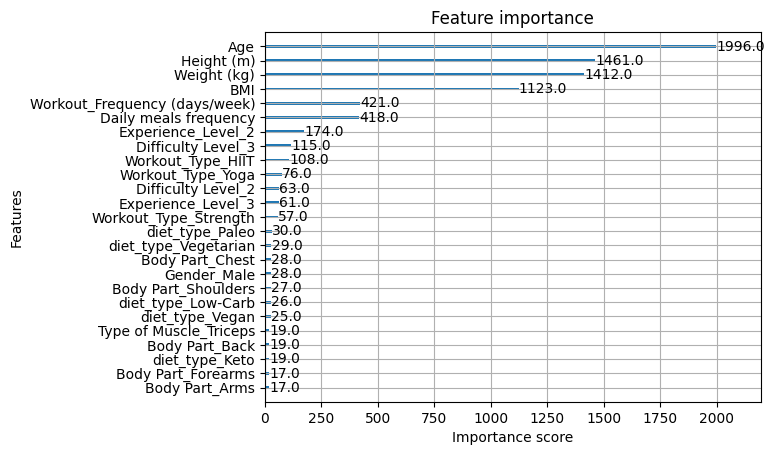

In [35]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

# График важности фич
plt.figure(figsize=(20, 70))
plot_importance(model, importance_type='weight', max_num_features=25) 
plt.show()

In [36]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print(f"R^2 on test sample: {r2}")

R^2 on test sample: 0.8903788380089777


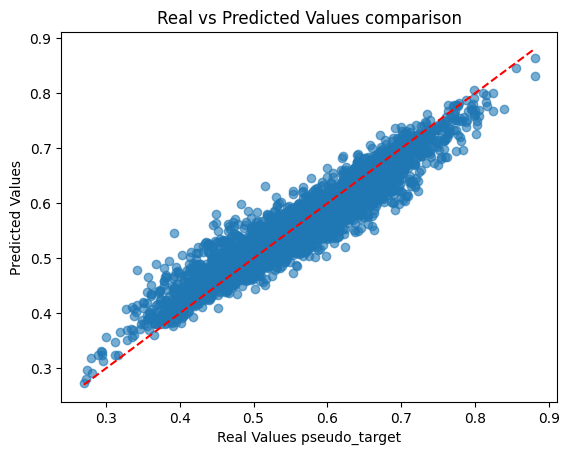

In [37]:
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("Real Values pseudo_target")
plt.ylabel("Predicted Values")
plt.title("Real vs Predicted Values comparison")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

In [ ]:
#best_model = grid_search.best_estimator_
# Предсказания на тренировке
y_train_pred = model.predict(X_train)
rmse_train = mean_squared_error(y_train, y_train_pred) ** 0.5

# Предсказания на тесте
y_test_pred = model.predict(X_test)
rmse_test = mean_squared_error(y_test, y_test_pred) ** 0.5

print(f"RMSE train: {rmse_train}")
print(f"RMSE test: {rmse_test}")

RMSE train: 0.027102539901979205
RMSE test: 0.032034859269199994


In [39]:
new_X_encoded = pd.get_dummies(workout_predict, columns=categorical_features, drop_first=True)

for col in X_encoded.columns:
    if col not in new_X_encoded.columns:
        new_X_encoded[col] = 0

new_X_encoded = new_X_encoded[X_encoded.columns]


In [43]:
workout_predict['pseudo_target'] = model.predict(new_X_encoded)

# Добавляем Sets, Reps, Calories_Burned в workout_predict
workout_predict['Sets'] = workouts['Sets']
workout_predict['Reps'] = workouts['Reps']
workout_predict['Burns Calories (per 30 min)'] = workouts['Burns Calories (per 30 min)']

new_df_sorted = workout_predict.sort_values(by='pseudo_target', ascending=False)

# После сортировки top30
topworkouts = new_df_sorted[['Name of Exercise', 'Workout_Type', 'Target Muscle Group', 
                               'Body Part', 'Type of Muscle', 'Difficulty Level', 
                               'Sets', 'Reps', 'Burns Calories (per 30 min)', 'pseudo_target']]
topworkouts = topworkouts.drop_duplicates()
topworkouts.head(30)

,Name of Exercise,Workout_Type,Target Muscle Group,Body Part,Type of Muscle,Difficulty Level,Sets,Reps,Burns Calories (per 30 min),pseudo_target
13162,Calf Raises,HIIT,"Quadriceps, Glutes",Legs,Wrist Extensors,1,4,22,342.10,0.525041
11552,Prone Cobras,HIIT,"Back, Core, Shoulders",Arms,Lower Chest,1,4,21,334.08,0.524005
5956,Windshield Wipers,HIIT,"Quadriceps, Glutes",Legs,Posterior,1,4,22,347.47,0.523901
18921,Prone Cobras,HIIT,"Back, Core, Shoulders",Forearms,Posterior,1,5,24,331.50,0.523400
18432,Prone Cobras,HIIT,"Back, Core, Shoulders",Legs,Quads,1,5,21,362.57,0.523222
7307,Prone Cobras,HIIT,"Quadriceps, Glutes",Arms,Middle,1,5,20,344.40,0.522976
18569,Pistol Squats,HIIT,"Back, Core, Shoulders",Legs,Wrist Flexors,1,5,18,349.45,0.521611
18866,Pull-ups,HIIT,"Back, Core, Shoulders",Arms,Lower Chest,1,4,15,368.52,0.521510
10022,Mountain Climbers,HIIT,"Quadriceps, Glutes",Abs,Lateral,1,5,15,334.88,0.521423
17703,Pistol Squats,HIIT,Core,Forearms,Wrist Extensors,1,4,18,344.94,0.521149


Text(0, 0.5, 'Count')

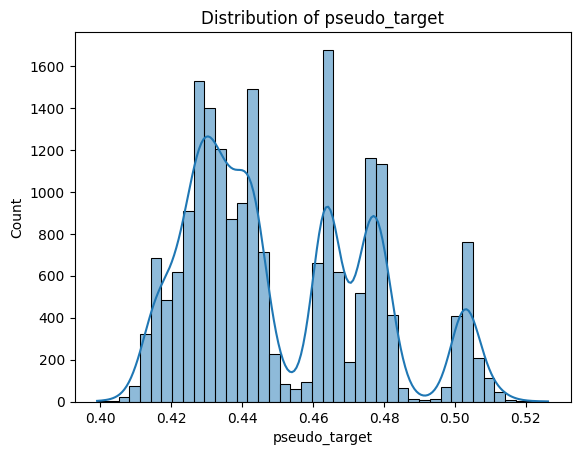

In [41]:
sns.histplot(new_df_sorted['pseudo_target'], kde=True) 
plt.title("Distribution of pseudo_target")
plt.xlabel('pseudo_target')
plt.ylabel("Count")

In [44]:
topworkouts.to_csv('data/user_workouts.csv', index=False)